In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('C:/Users/91959/Downloads/owid-covid-data.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176224 entries, 0 to 176223
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    176224 non-null  object 
 1   continent                                   165891 non-null  object 
 2   location                                    176224 non-null  object 
 3   date                                        176224 non-null  object 
 4   total_cases                                 169905 non-null  float64
 5   new_cases                                   169680 non-null  float64
 6   new_cases_smoothed                          167685 non-null  float64
 7   total_deaths                                151828 non-null  float64
 8   new_deaths                                  151827 non-null  float64
 9   new_deaths_smoothed                         149664 non-null  float64
 

In [12]:
# Data preprocessing: Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [14]:
# Display information about missing values
print("Null Values Before Cleaning:")
print(df.isnull().sum())

# Dropping rows with null values
data_cleaned = df.dropna()

Null Values Before Cleaning:
iso_code                                        0
continent                                   10333
location                                        0
date                                            0
total_cases                                  6319
                                            ...  
human_development_index                     34314
excess_mortality_cumulative_absolute       170201
excess_mortality_cumulative                170201
excess_mortality                           170201
excess_mortality_cumulative_per_million    170201
Length: 67, dtype: int64


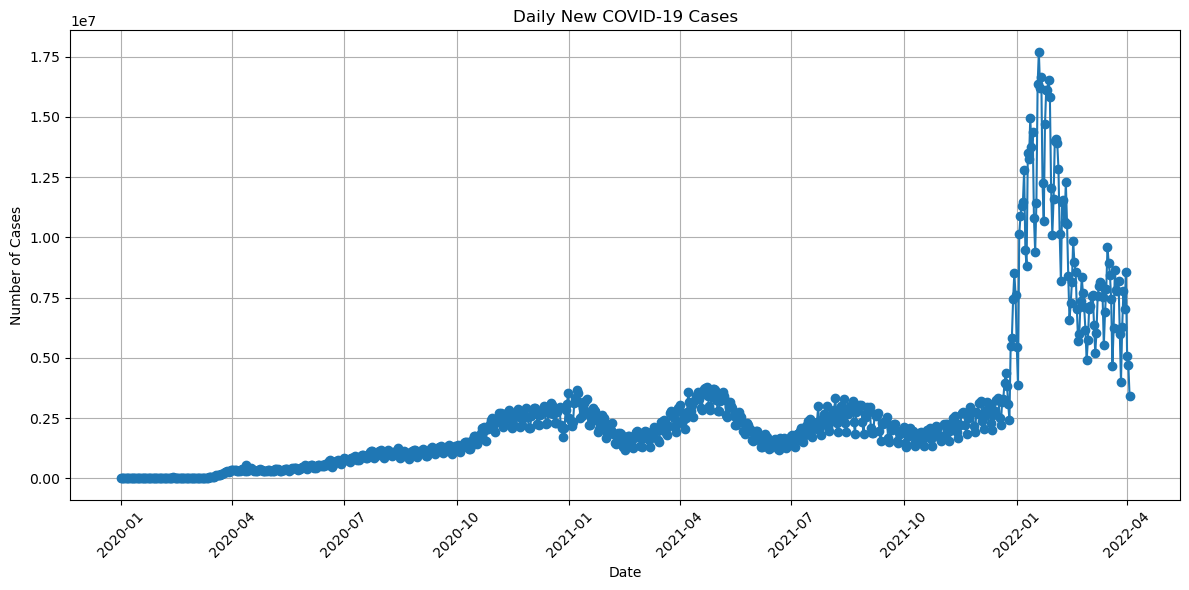

In [20]:

# Group by date and sum the new cases for each day
daily_cases = df.groupby('date')['new_cases'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_cases['date'], daily_cases['new_cases'], marker='o', linestyle='-')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

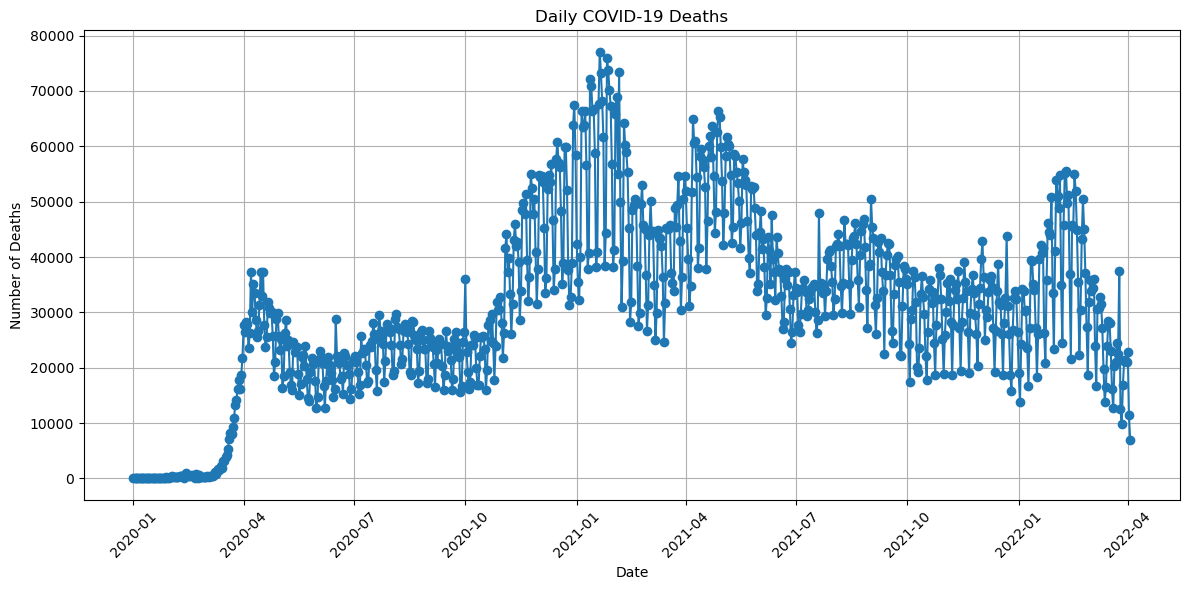

In [22]:
# Group by date and sum the new deaths for each day
daily_deaths = df.groupby('date')['new_deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_deaths['date'], daily_deaths['new_deaths'], marker='o', linestyle='-')
plt.title('Daily COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

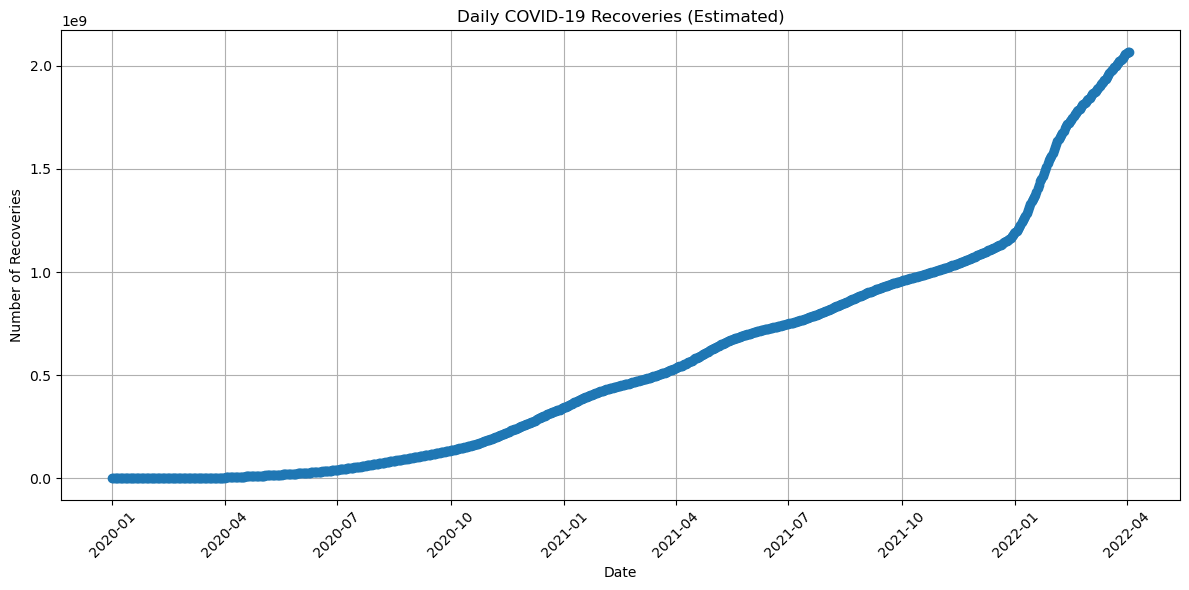

In [24]:
# Calculate daily recoveries
df['daily_recoveries'] = df['total_cases'] - df['total_deaths']

# Group by date and calculate the sum of daily recoveries for each day
daily_recoveries = df.groupby('date')['daily_recoveries'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_recoveries['date'], daily_recoveries['daily_recoveries'], marker='o', linestyle='-')
plt.title('Daily COVID-19 Recoveries (Estimated)')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

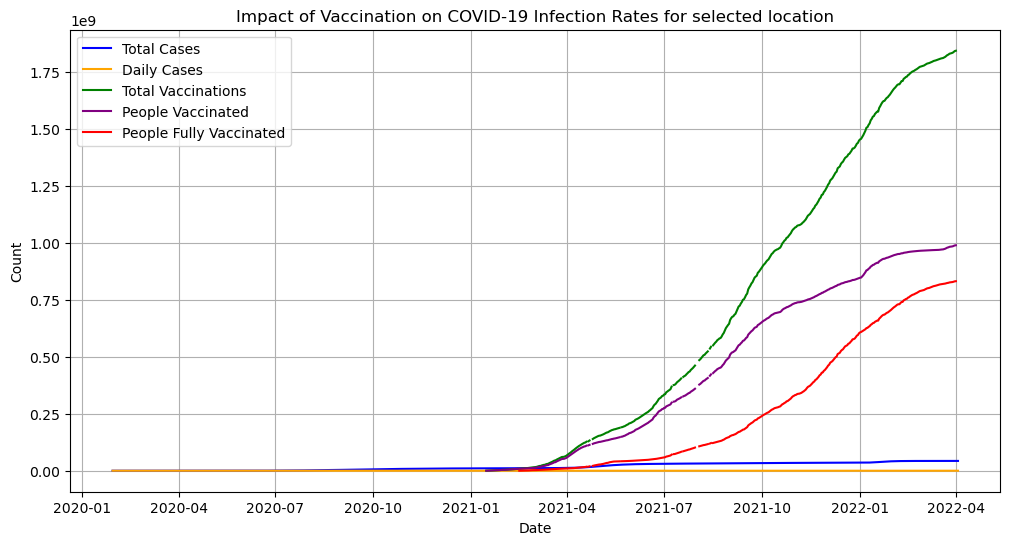

In [18]:
# Select relevant columns for analysis
columns_of_interest = ['date', 'location', 'total_cases', 'new_cases', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
selected_data = df[columns_of_interest]

# Filter data for a specific country or region
country_data = selected_data[selected_data['location'] == 'India']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(country_data['date'], country_data['total_cases'], label='Total Cases', color='blue')
plt.plot(country_data['date'], country_data['new_cases'], label='Daily Cases', color='orange')
plt.plot(country_data['date'], country_data['total_vaccinations'], label='Total Vaccinations', color='green')
plt.plot(country_data['date'], country_data['people_vaccinated'], label='People Vaccinated', color='purple')
plt.plot(country_data['date'], country_data['people_fully_vaccinated'], label='People Fully Vaccinated', color='red')

plt.title('Impact of Vaccination on COVID-19 Infection Rates for selected location')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
df_country.plot()

NameError: name 'df_country' is not defined